# 01_TechMentalHealth_Draft 1

# Ideas

1. Eliminate userid
2. Eliminate states in US
3. Question 5: Yes and No instead of 0 and 1
4. Question 9: Yes and No instead of 0 and 1
5. Question 13: Answers are 0, 1, -1. (YES, NO, UNANSWERED)
6. Question 14: Answers are Yes, No, -1. 
8. Question 20: Many people did not answer this question. Why? Maybe they didn't know and there was no choice for that?
9. Question 21: Many people did not answer.
10. Question 32: Everyone answered it. Why?
11. Question 33: What is the difference between possibly and maybe?
12. Questioin 34: Were they not scared to answer yes? Many did not answer.
13. Question 51: Eliminate states in US
14. 52: Many no answer.
15. 84: Nobody answered this question. Why?
16. 86: What can you gain from this answer if you could generalize?
Does the country matter in regards to support?


# Insights
1. Data measures attitudes and frequency
2. The year of the survey (SurveyID) doesn't matter since they are so close to one another 
3. Some questions can contain multiple answers, thus the same user can appear more than once for that questionid

# Introduction

# Goal

# Hypothesis

# Technical Requirements

1. Download the data from Mental Health in the Tech Industry.
2. Load the data using SQLite and Pandas.
3. Perform exploratory data analysis. This should include creating statistical summaries and charts, testing for anomalies, checking for correlations and other relations between variables, and other EDA elements.
4. Provide clear explanations in your notebook. Your explanations should inform the reader what you are trying to achieve, what results did you get, and what these results mean.
5. Provide suggestions about how your analysis can be improved.

# Data Sets

- This data is from Open Source Mental Illness (OSMI) using survey data from years 2014, 2016, 2017, 2018 and 2019. 
- Each survey measures the attitudes towards mental health and frequency of mental health disorders in the tech workplace.
- The raw data was processed using Python, SQL and Excel for cleaning and manipulation. Steps involved in cleaning were

    - Similar questions were group together
    - Values for answers were made consistent (ie 1 == 1.0)
    - Fixing spelling errors

- The SQLite database contains 3 tables. Survey, Question, and Answer.

    - Survey (PRIMARY KEY INT SurveyID, TEXT Description)
    - Question (PRIMARY KEY QuestionID, TEXT QuestionText)
    - Answer (PRIMARY/FOREIGN KEY SurveyID, PRIMARY KEY UserID, PRIMARY/FOREIGN KEY QuestionID, TEXT AnswerText)

- SuveyID are simply survey year ie 2014, 2016, 2017, 2018, 2019.
- The same question can be used for multiple surveys
- Answer table is a composite table with multiple primary keys. SurveyID and QuestionID are FOREIGN KEYS.
- Some questions can contain multiple answers, thus the same user can appear more than once for that questionid.

Common SQL queries
query text information for Questionid
- SELECT * FROM Question where QuestionID = 13;

query all answers for specified Questionid
- SELECT AnswerText FROM Answer where QuestionID = 13;

query distribution of answer given questionid
- SELECT AnswerText, COUNT(AnswerText) from Answer where QuestionID = 13 group by AnswerText;

query distribution of answer given questionid and survey year
- SELECT AnswerText, COUNT(AnswerText) from Answer where QuestionID = 1 and surveyid = 2016 group by AnswerText;

query number of participants for each survey
- SELECT surveyid, COUNT(DISTINCT(userid)) FROM answer GROUP BY surveyid;

# Tables

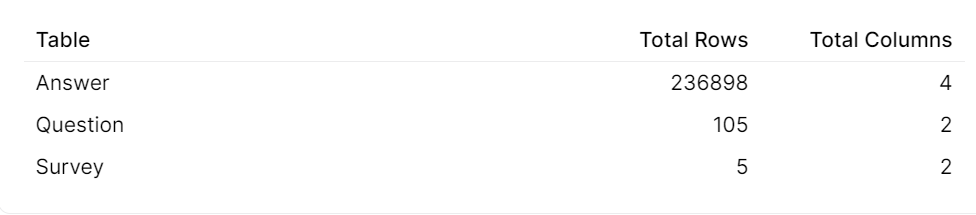

# Libraries

In [32]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import datetime
import matplotlib.dates as mdates

from scipy import stats
from matplotlib.dates import DateFormatter
from IPython.display import display, HTML

%matplotlib inline


# Load and Display Raw Data

In [33]:
db = sqlite3.connect(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\TechMentalHealth\\DataSet\\mental_health.sqlite"
)

In [34]:
%matplotlib inline
pd.options.display.max_rows = 300000
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 500

# Questions to Explore

- Show distinct answer for each question and how many answered that answer.
- Everywhere change, "Not sure," "I'm not sure" to "Not Sure"
- Change -1 to No Response (NR)
- Correlate openness to friends and family to openess to employer.
- Write the question. Show current answers. Show cleaned up answers.
- Correlation of race with mental illness.
- Remote work and mental health
- 115: Number of people with each diagnosis
- 118 is about working remotely. 


1. Question 1: Age range of respondants
2. Question 2: 99 distinct way they answered about gender. Turn all the the answers to LGBTQ
3. Question 3: Number of respondants from each country.
4. Question 4: Eliminate states in US
5. Question 5: Yes and No instead of 0 and 1
6. Question 6: Yes and No instead of 0 and 1
7. Question 7: Yes and No instead of 0 and 1
8. Question 8: Do the range in order
9. Question 9: Yes and No instead of 0 and 1
10. Question 10: "I don't know." "Don't know"
11. Question 11: "I don't know." "Don't know"
12. Question 12: Yes, No, Maybe
13. Question 13: Yes and No instead of 0 and 1
14. Question 14: "Not sure," "I'm not sure"
15. Question 15: "I don't know." "Don't know"
16. Question 16: "I don't know." "Don't know"
17. Question 17: "I don't know." "Don't know"
18. Question 18: Yes, Maybe, No (Change -1 to no response)
19. Question 19: Yes, Maybe, No
20. Question 20: Yes and No instead of 0 and 1
21. Question 21: Change -1 to no response
22. Question 22: 0, 1 to Yes, No
23. Question 23: Change -1 to no response
24. Question 24: "was not aware" None offered. Change NA to these.
Question 28: They talk both about employer and supervisor.
Question 32, 33: Maybe possibly and don't know are the same.
49: very good: sometimes, often, rarely, never.
50: What country work in. 3: What country live in.
51: Eliminate.
54: Unsure to Not sure.
56: Maybe/Not sure to sure.
57: 
59, 61, 63, 71: Supportive (Words), Somewhat Supportive (Some action), Extremely supportive (A lot of action), Neutral (No words, not action), Not supportive (Treated badly), Extremely not supportive (Got fired)
82: Bad, very bad, extremely bad.
85: 1 - 5 Scale. Explain scale.
86: 
88: Eliminate
In the answers table, survey ID (YEAR) and User ID does not matter. Eliminate both columns.

How many people were surveyed each year? 
How many answers were collected ea

## Question Table

In [35]:
df_question = pd.read_sql_query("SELECT * FROM Question", db)

In [38]:
df_question.style.set_properties(**{'text-align': 'left'})

,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state or territory do you live in?",4
4,Are you self-employed?,5
5,Do you have a family history of mental illness?,6
6,Have you ever sought treatment for a mental health disorder from a mental health professional?,7
7,How many employees does your company or organization have?,8
8,Is your employer primarily a tech company/organization?,9
9,Does your employer provide mental health benefits as part of healthcare coverage?,10


## Survey Table

In [16]:
df_survey = pd.read_sql_query("SELECT * FROM Survey", db)

In [17]:
df_survey

,SurveyID,Description
0,2014,mental health survey for 2014
1,2016,mental health survey for 2016
2,2017,mental health survey for 2017
3,2018,mental health survey for 2018
4,2019,mental health survey for 2019


### Section Summary
> * Question ID is from 1 - 118. Number of rows is 1 - 104.
> * 13 numbers are missing in the QuestionID column: 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47.
> * Eliminate question 87
> * Question 15 and 95 are the same.

14: Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?

81: Has your employer ever discussed mental health as part of an employee wellness program?


## Answer Table

In [18]:
df_answer = pd.read_sql_query("SELECT * FROM Answer", db)

In [19]:
df_answer.head(100)

,AnswerText,SurveyID,UserID,QuestionID
0,37,2014,1,1
1,44,2014,2,1
2,32,2014,3,1
3,31,2014,4,1
4,31,2014,5,1
5,33,2014,6,1
6,35,2014,7,1
7,39,2014,8,1
8,42,2014,9,1
9,23,2014,10,1


In [11]:
df_answer = pd.read_sql_query(
    "SELECT DISTINCT AnswerText FROM Answer where QuestionID = 118", db
)
df_answer

,AnswerText
0,Sometimes
1,Never
2,Always


## Colors

## Figure Parameters

# Exploratory Data Analysis

# Conclusions

# Suggestions for Improvement

# Appendix


Use a little bit of text in your graphs to explain it.
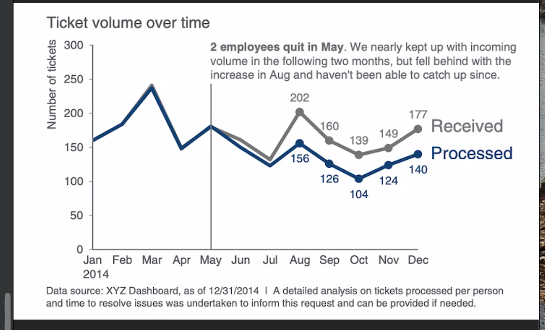
